<a href="https://colab.research.google.com/github/Bhageerath123/ML-Models-for-Detecting-Malicious-Traffic-using-IOT-23-Datasets/blob/main/Small_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

title: preprocessed final_2.csv, id: 1LE5qqd3Jv9aArH83gIIQOzQqrRtkiEsH
title: preprocessed final_1.csv, id: 1LdY_SCqKLJI3O9qY36tNzktBiLY7ZiQd
title: Dtaset 4Labels, id: 1UsYulnKaEz96fbTA9pAhErwybAHpsm7q
title: FINAL DATASET 4.csv, id: 1fRs2RE2LKJ7nW0-4Z95T626wibAlebL3
title: Sample2.csv, id: 15nJR4HagHSkOvLS86Z-I6G2FVwSBsN-x
title: Sample2, id: 1sgUoRPSs1NZT2BwufU2zwca8kXKE8oz6F_0d8zj7fHw
title: preprocessed final.csv, id: 1xOROenk2PKd50HpEaxNcoHIVgT1YzXiv
title: Final Dataset 0 1_1, id: 1-AZmpDkwNCzEXgYBMAhmoaDFEkynhtbf
title: Final Dataset_1_1.csv, id: 1NskVqX2h4KcdhjSRJNeCG5fbpMHOrTCV
title: Final Dataset 0 1_2, id: 1w_V8insIM0L_Y1sfUlgz5tBRsLHC_vz3
title: Final Dataset 0 1, id: 1qOXERY14g_QYB8k-g6bQgqrBI8_bqqsZ
title: Final Dataset, id: 133-6o2oO_nQyjv8z1f0KGNvDU55r_-G1
title: dataset4.csv, id: 18ZHKl1-5V9Abz923O5Zk1KptEL0tRxgb
title: dataset1.csv, id: 18s59CqeQw0r5fjKbpAHCOcqWeKYhRzXB
title: kdd_train.csv, id: 1EpMHv7uUKmYYJRMUwwBaWs_2bXegDxla
title: Final, id: 1B9jeMN_Tyr_og62Jq-

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import sys
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
downloadedTrain = drive.CreateFile({'id': '1fRs2RE2LKJ7nW0-4Z95T626wibAlebL3'})
downloadedTrain.GetContentFile('dataset.csv')

In [ ]:
data3=pd.read_csv('dataset.csv')

In [ ]:
data3.head()

,ts,uid,idorighost,idorigport,idresphost,idrespport,proto,service,duration,origbytes,respbytes,connstate,localorig,localresp,missedbytes,history,origpkts,origipbytes,resppkts,respipbytes,Label
0,1551394679,CbTtiaSZOONZ0heB,192.168.1.193,51390,134.209.72.171,4554,tcp,-,0.226369,11.0,11.0,SF,-,-,0,ShADdfrFr,10,558,10,510,2
1,1551377745,CGSBMd4KoxEIXeZsF1,192.168.1.200,54194,167.99.182.238,80,tcp,http,1.069631,149.0,88857.0,SF,-,-,0,ShADadttfF,130,7242,129,184438,12
2,1547144649,CTFA642dkB7jUtRFo3,192.168.1.198,36942,142.11.219.83,80,tcp,http,2.976298,158.0,80326.0,SF,-,-,0,ShADadttfF,60,3658,58,83350,1
3,1547147324,CBovrE3TwBG3940rlb,192.168.1.198,50980,142.11.219.83,45,tcp,-,NaN,NaN,NaN,S0,-,-,0,S,1,60,0,0,2
4,1551407734,CLGWVE1m6Z8WpGzzQ7,192.168.1.200,55272,167.99.182.238,23,tcp,-,3.122481,0.0,0.0,S0,-,-,0,S,6,360,0,0,11


In [ ]:
#data3.to_csv('data3')

In [ ]:
#data3=pd.read_csv('sample.csv', sep='\t')
#names=["ts",	"uid",	"id.orig_h",	"id.orig_p",	"id.resp_h",	"id.resp_p",	"proto",		"service", 	"duration",	"orig_bytes",	"resp_bytes",	"conn_state",	"local_orig",	"local_resp",	"missed_bytes",	"history", "orig_pkts",	"orig_ip_bytes",	"resp_pkts",	"resp_ip_bytes", "label","detailed-label"])


In [ ]:
data3.dtypes

ts               int64
uid             object
idorighost      object
idorigport       int64
idresphost      object
idrespport       int64
proto           object
service         object
duration       float64
origbytes      float64
respbytes      float64
connstate       object
localorig       object
localresp       object
missedbytes      int64
history         object
origpkts         int64
origipbytes      int64
resppkts         int64
respipbytes      int64
Label            int64
dtype: object

In [ ]:
data3=data3.drop(['localorig','localresp','uid'], axis=1)

In [ ]:
data3.head(20)

,ts,idorighost,idorigport,idresphost,idrespport,proto,service,duration,origbytes,respbytes,connstate,missedbytes,history,origpkts,origipbytes,resppkts,respipbytes,Label
0,1551394679,192.168.1.193,51390,134.209.72.171,4554,tcp,-,0.226369,11.0,11.0,SF,0,ShADdfrFr,10,558,10,510,2
1,1551377745,192.168.1.200,54194,167.99.182.238,80,tcp,http,1.069631,149.0,88857.0,SF,0,ShADadttfF,130,7242,129,184438,12
2,1547144649,192.168.1.198,36942,142.11.219.83,80,tcp,http,2.976298,158.0,80326.0,SF,0,ShADadttfF,60,3658,58,83350,1
3,1547147324,192.168.1.198,50980,142.11.219.83,45,tcp,-,NaN,NaN,NaN,S0,0,S,1,60,0,0,2
4,1551407734,192.168.1.200,55272,167.99.182.238,23,tcp,-,3.122481,0.0,0.0,S0,0,S,6,360,0,0,11
5,1538520772,192.168.100.103,38096,66.85.157.90,443,tcp,-,3.145482,0.0,0.0,S0,0,S,3,180,0,0,10
6,1551377742,192.168.1.200,52732,167.99.182.238,80,tcp,http,1.938142,149.0,117700.0,SF,0,ShADadttfF,170,11602,170,244256,12
7,1551387866,192.168.1.193,50650,134.209.72.171,4554,tcp,-,0.000005,0.0,0.0,S0,0,S,2,120,0,0,2
8,1552099002,192.168.1.197,123,46.28.109.26,123,udp,-,0.000006,96.0,0.0,S0,0,D,2,152,0,0,0
9,1547148188,192.168.1.198,52044,142.11.219.83,45,tcp,-,3.109232,0.0,0.0,S0,0,S,3,180,0,0,2


In [ ]:
data3.dtypes

ts               int64
idorighost      object
idorigport       int64
idresphost      object
idrespport       int64
proto           object
service         object
duration       float64
origbytes      float64
respbytes      float64
connstate       object
missedbytes      int64
history         object
origpkts         int64
origipbytes      int64
resppkts         int64
respipbytes      int64
Label            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#encoder=OneHotEncoder()

In [ ]:
data3['service'] = data3['service'].str.replace('-', ' ')

In [ ]:
data3['proto'] = data3['proto'].str.replace('-', ' ')

In [ ]:
encoder = LabelEncoder()
data3['proto'] = data3['proto'].str.replace('-', ' ')
data3['proto'] = data3['proto'].astype(str)
data3['proto'] = encoder.fit_transform(data3['proto'])
data3['service'] = data3['service'].str.replace('-', ' ')
data3['service'] = data3['service'].astype(str)
data3['service'] = encoder.fit_transform(data3['service'])
data3['uid'] = data3['uid'].astype(str)
data3['uid'] = encoder.fit_transform(data3['uid'])
data3['localorig'] = data3['localorig'].astype(str)
data3['localorig'] = encoder.fit_transform(data3['localorig'])
data3['localresp'] = data3['localresp'].astype(str)
data3['localresp'] = encoder.fit_transform(data3['localresp'])

In [ ]:
encoder = LabelEncoder()
data3['connstate'] = data3['connstate'].str.replace('-', ' ')
data3['connstate'] = data3['connstate'].astype(str)
data3['connstate'] = encoder.fit_transform(data3['connstate'])

In [ ]:
encoder = LabelEncoder()
data3['history'] = data3['history'].str.replace('-', ' ')
data3['history'] = data3['history'].astype(str)
data3['history'] = encoder.fit_transform(data3['history'])

In [ ]:
encoder = LabelEncoder()
data3['idorighost'] = data3['idorighost'].astype(str)
data3['idorighost'] = encoder.fit_transform(data3['idorighost'])

In [ ]:
encoder = LabelEncoder()
data3['idresphost'] = data3['idresphost'].astype(str)
data3['idresphost'] = encoder.fit_transform(data3['idresphost'])

In [ ]:
data3.dtypes

ts               int64
uid              int64
idorighost       int64
idorigport       int64
idresphost       int64
idrespport       int64
proto            int64
service          int64
duration       float64
origbytes      float64
respbytes      float64
connstate        int64
localorig        int64
localresp        int64
missedbytes      int64
history          int64
origpkts         int64
origipbytes      int64
resppkts         int64
respipbytes      int64
Label            int64
dtype: object

In [ ]:
data3.head(20)

,ts,idorighost,idorigport,idresphost,idrespport,proto,service,duration,origbytes,respbytes,connstate,missedbytes,history,origpkts,origipbytes,resppkts,respipbytes,Label
0,1551394679,794,51390,771,4554,1,0,0.226369,11.0,11.0,8,0,88,10,558,10,510,2
1,1551377745,801,54194,1266,80,1,3,1.069631,149.0,88857.0,8,0,65,130,7242,129,184438,12
2,1547144649,799,36942,881,80,1,3,2.976298,158.0,80326.0,8,0,65,60,3658,58,83350,1
3,1547147324,799,50980,881,45,1,0,NaN,NaN,NaN,5,0,13,1,60,0,0,2
4,1551407734,801,55272,1266,23,1,0,3.122481,0.0,0.0,5,0,13,6,360,0,0,11
5,1538520772,802,38096,4807,443,1,0,3.145482,0.0,0.0,5,0,13,3,180,0,0,10
6,1551377742,801,52732,1266,80,1,3,1.938142,149.0,117700.0,8,0,65,170,11602,170,244256,12
7,1551387866,794,50650,771,4554,1,0,0.000005,0.0,0.0,5,0,13,2,120,0,0,2
8,1552099002,798,123,4506,123,2,0,0.000006,96.0,0.0,5,0,0,2,152,0,0,0
9,1547148188,799,52044,881,45,1,0,3.109232,0.0,0.0,5,0,13,3,180,0,0,2


In [ ]:
#data3['Label'] = data3['Label'].astype(float)


Instead of converting each feature to int/float datatype seperately, we can use the below coade using for loop.
cat_features means categorical Features

In [ ]:
#cat_features=[x for x in data3.columns if data3[x].dtype=="object"]

#le=LabelEncoder()

#for col in cat_features:
    #if col in data3.columns:
       # i = data3.columns.get_loc(col)
       # data3.iloc[:,i] = data3.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
data3.nunique()

ts             31646
uid            36877
idorighost      3082
idorigport     13322
idresphost      5160
idrespport       103
proto              3
service            6
duration       19479
origbytes        167
respbytes        419
connstate         11
localorig          1
localresp          1
missedbytes       30
history          168
origpkts         137
origipbytes      678
resppkts         119
respipbytes      936
Label             10
dtype: int64

In [ ]:
np.any(np.isnan(data3))

True

In [ ]:
data3.isnull().sum()

ts                 0
idorighost         0
idorigport         0
idresphost         0
idrespport         0
proto              0
service            0
duration       12186
origbytes      12186
respbytes      12186
connstate          0
missedbytes        0
history            0
origpkts           0
origipbytes        0
resppkts           0
respipbytes        0
Label              0
dtype: int64

In [ ]:
data3[['duration','origbytes','respbytes']] = data3[['duration','origbytes','respbytes']].fillna(value=data3[['duration','origbytes','respbytes']].mean())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import sys
import seaborn as sns

In [ ]:
np.any(np.isnan(data3))

False

In [ ]:
data3.isna().sum()

ts             0
idorighost     0
idorigport     0
idresphost     0
idrespport     0
proto          0
service        0
duration       0
origbytes      0
respbytes      0
connstate      0
missedbytes    0
history        0
origpkts       0
origipbytes    0
resppkts       0
respipbytes    0
Label          0
dtype: int64

In [ ]:
y1=data3['Label']
#y=data['Label']

In [ ]:
y1

0         2
1        12
2         1
3         2
4        11
         ..
90872    11
90873     5
90874     2
90875     7
90876     1
Name: Label, Length: 90877, dtype: int64

In [ ]:
y1=encoder.fit_transform(y1)

In [ ]:
y1

array([2, 9, 1, ..., 2, 5, 1])

In [ ]:
y=pd.get_dummies(y1)

In [ ]:
y

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
90872,0,0,0,0,0,0,0,0,1,0
90873,0,0,0,0,1,0,0,0,0,0
90874,0,0,1,0,0,0,0,0,0,0
90875,0,0,0,0,0,1,0,0,0,0


In [ ]:
x=data3.drop(['Label'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=2)
                                            

In [ ]:
data3.nunique()

ts             31646
idorighost      3082
idorigport     13322
idresphost      5160
idrespport       103
proto              3
service            6
duration       19480
origbytes        168
respbytes        420
connstate         11
missedbytes       30
history          168
origpkts         137
origipbytes      678
resppkts         119
respipbytes      936
Label             10
dtype: int64

In [ ]:
y.nunique()

0     2
1     2
2     2
4     2
5     2
7     2
8     2
10    2
11    2
12    2
dtype: int64

In [ ]:
y_train.shape

(68157, 10)

In [ ]:
y_test.shape


(22720, 10)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import sys
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
st=StandardScaler()

In [ ]:
st.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_train=pd.DataFrame(st.transform(x_train))
x_test=pd.DataFrame(st.transform(x_test))

In [ ]:
  x_train.shape

(54526, 17)

Logistc Regression Model

In [ ]:
weights = tf.Variable(tf.random.normal(shape=(17, 10), dtype=tf.float64))
biases  = tf.Variable(tf.random.normal(shape=(10,), dtype=tf.float64))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
def logistic_regression(x):
    lr = tf.add(tf.matmul(x, weights), biases)
    return lr


def cross_entropy(y_true, y_pred):
    loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return tf.reduce_mean(loss)

def accuracy(y_true, y_pred):
    y_true = tf.cast(tf.argmax(y_true,axis=1), dtype=tf.int32)
    preds = tf.cast(tf.argmax(y_pred, axis=1), dtype=tf.int32)
    preds = tf.equal(y_true, preds)
    return tf.reduce_mean(tf.cast(preds, dtype=tf.float32))

def roc_auc(y_true,x):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32).numpy()
    y_pred=tf.nn.softmax(logistic_regression(x))[:,1]
    #lb = LabelBinarizer()
    #lb.fit(y_test)
    #y_true = lb.transform(y_true)
    #y_pred = lb.transform(y_pred)
    return(roc_auc_score(y_true,y_pred))

def grad(x, y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss_val = cross_entropy(y, y_pred)
    return tape.gradient(loss_val, [weights, biases])

In [ ]:
epochs=1000

In [ ]:
learning_rate=0.1
for epoch in range(epochs):
    rand_ind=np.random.choice(range(x_train.shape[0]),100)
    outputs=y_train.iloc[rand_ind,:].values
    inputs=x_train.iloc[rand_ind,:].values
    
    dw,db=grad(inputs,tf.cast(outputs,'float32'))
    
    weights.assign_sub(learning_rate*dw)
    biases.assign_sub(learning_rate*db)
    
    if epoch%100==0:
      print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy())
      #print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy())

0.23609889
0.6278609
0.8239437
0.8612456
0.89770395
0.91879404
0.91347563
0.9076071
0.92165494
0.9154563


In [ ]:
weights_h = tf.Variable(tf.random.truncated_normal(shape=(17, 12), dtype=tf.float64))
biases_h  = tf.Variable(tf.random.truncated_normal(shape=(12,), dtype=tf.float64))

weights_o = tf.Variable(tf.random.truncated_normal(shape=(12, 10), dtype=tf.float64))
biases_o  = tf.Variable(tf.random.truncated_normal(shape=(10,), dtype=tf.float64))

In [ ]:
def logistic_regression(x):
    h_o = tf.add(tf.matmul(x, weights_h), biases_h)
    h_o=tf.nn.relu(h_o)
    lr=tf.add(tf.matmul(h_o, weights_o), biases_o)
    return lr


def cross_entropy(y_true, y_pred):
    

    loss =tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return tf.reduce_mean(loss)


def accuracy(y_true, y_pred):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32)
    preds = tf.cast(tf.argmax(y_pred, axis=1), dtype=tf.int32)
    preds = tf.equal(y_true, preds)
    return tf.reduce_mean(tf.cast(preds, dtype=tf.float32))

def roc_auc(y_true,x):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32).numpy()
    y_pred=tf.nn.softmax(logistic_regression(x))[:,1]
    return(roc_auc_score(y_true,y_pred))

def grad(x, y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss_val = cross_entropy(y, y_pred)
    return tape.gradient(loss_val, [weights_h, biases_h,weights_o, biases_o])

In [ ]:
epochs=2000

In [ ]:
learning_rate=0.1
for epoch in range(epochs):
    rand_ind=np.random.choice(range(x_train.shape[0]),100)
    outputs=y_train.iloc[rand_ind,:].values
    inputs=x_train.iloc[rand_ind,:].values
    dw_h,db_h,dw_o,db_o=grad(inputs,tf.cast(outputs,'float32'))
    
    weights_h.assign_sub(learning_rate*dw_h)
    biases_h.assign_sub(learning_rate*db_h)
    weights_o.assign_sub(learning_rate*dw_o)
    biases_o.assign_sub(learning_rate*db_o)
    
    if epoch%200==0:
        print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy())
    
    

0.0545163
0.9196089
0.9500739
0.95419246
0.95837396
0.9578395
0.9629327
0.9699752
0.9733707
0.9746282


In [ ]:
 print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy())

0.9750998


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
y_pred=np.argmax(logistic_regression(x_test), axis=1)

In [ ]:
y_test=np.argmax(y_test.values, axis=1)
y_test[1]

6

In [ ]:
y_test

array([4, 6, 4, ..., 8, 5, 8])

In [ ]:
print('Precision: {:.5f}'.format(precision_score(y_test,y_pred,average="macro")))
print('Recall: {:.5f}'.format(recall_score(y_test,y_pred,average="macro")))
print('F1-score: {:.5f}\n'.format(f1_score(y_test,y_pred,average="macro")))

Precision: 0.97639
Recall: 0.97424
F1-score: 0.97446



In [ ]:
confusion_matrix(y_test, y_pred)

array([[3068,    1,    2,    1,    0,    1,    3,    0,    3,    0],
       [   0, 2845,    0,    0,   64,    0,    0,    0,    0,  203],
       [   1,    0, 2588,    0,    0,   51,    0,   96,  277,    0],
       [   0,    0,    0, 3248,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 3145,    0,    0,    0,    0,    0],
       [  17,    6,   57,    0,    1, 3182,    0,    4,    4,    0],
       [   0,    0,    0,    0,    0,    0, 3167,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 3239,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 3386,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 3147]])

In [ ]:
from sklearn import metrics

Text(0.5, 257.44, 'Predicted label')

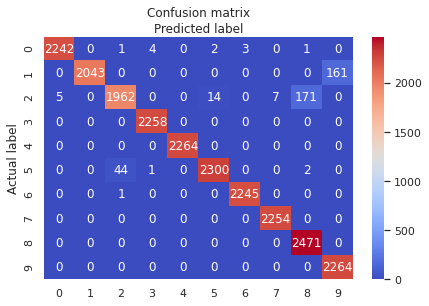

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
class_names=[0,1,2,4,5,7,8,10,11,12]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
n_classes = y.shape[1]

In [ ]:
n_classes

10

In [ ]:
y_test = label_binarize(y_test, classes =[0,1,2,3,4,5,6,7,8,9])

In [ ]:
y_pred = label_binarize(y_pred, classes=[0,1,2,3,4,5,6,7,8,9])

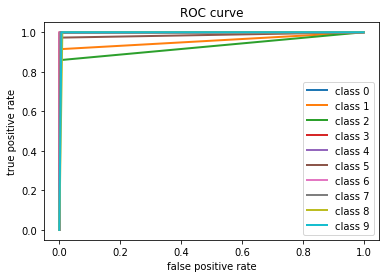

In [ ]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_pred[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [ ]:
y_test[:, i]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred[:, i]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

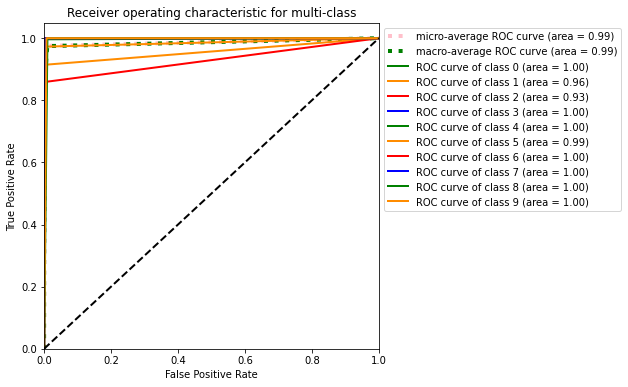

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'red','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

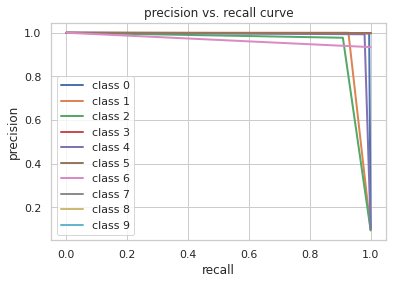

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# **Decision-Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Y=data3['Label']

In [ ]:
X=data3.drop(['Label'],axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state = 2)

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
%%time
from sklearn.metrics import accuracy_score


CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 42.4 µs


In [ ]:
st=StandardScaler()

In [ ]:
st.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train=pd.DataFrame(st.transform(X_train))
X_test=pd.DataFrame(st.transform(X_test))

In [ ]:
dtree.fit(X_train,Y_train)
Y_predsDT = dtree.predict(X_test)


accuracy_score(Y_test, Y_predsDT)


0.9998166079812206

In [ ]:
YpredsDT_prob = dtree.predict_proba(X_test)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
def multiclass_roc_auc_score(Y_test, Y_predsDT, average="macro"):
    lb = LabelBinarizer()
    lb.fit(Y_test)
    Y_test = lb.transform(Y_test)
    Y_predsDT = lb.transform(Y_predsDT)
    return roc_auc_score(Y_test, Y_predsDT, average=average)


In [ ]:
multiclass_roc_auc_score(Y_test, Y_predsDT)

0.9999015135938942

In [ ]:
print('Precision: {:.5f}'.format(precision_score(Y_test, Y_predsDT, average='macro')))
print('Recall: {:.5f}'.format(recall_score(Y_test, Y_predsDT, average='macro')))
print('F1-score: {:.5f}\n'.format(f1_score(Y_test, Y_predsDT, average='macro')))

Precision: 0.99981
Recall: 0.99981
F1-score: 0.99981



In [ ]:
confusion_matrix(Y_test, Y_predsDT)

array([[2609,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2680,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    1, 2612,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2780,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2712,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1, 2768,    0,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0, 2731,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2762,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2919,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 2686]])

Text(0.5, 257.44, 'Predicted label')

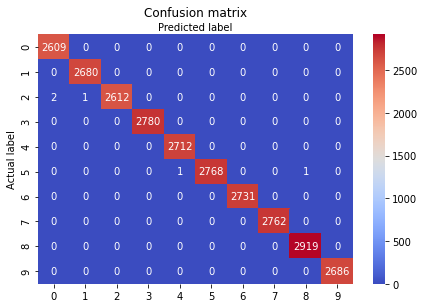

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predsDT)
class_names=[0,1,2,4,5,7,8,10,11,12]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Y_test = label_binarize(Y_test, classes=[0,1,2,4,5,7,8,10,11,12])


In [ ]:
Y_predsDT = label_binarize(Y_predsDT, classes=[0,1,2,4,5,7,8,10,11,12])


In [ ]:
Y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
n_classes=10

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_predsDT[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_predsDT.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

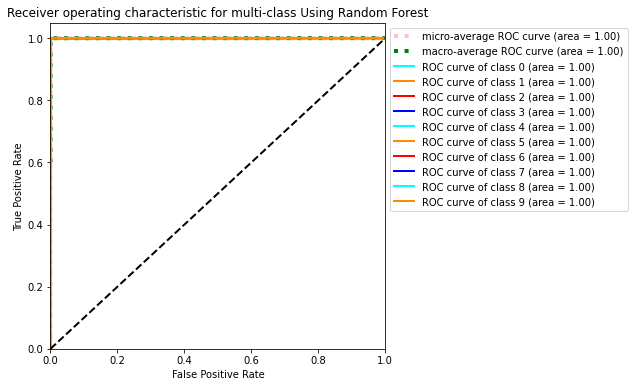

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'red','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

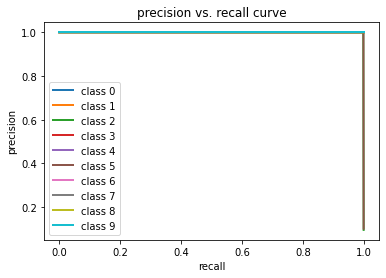

In [ ]:
precision = dict()
recall = dict()
colors = cycle(['blue', 'darkorange', 'green','yellow'])
for i, color in zip(range(n_classes), colors):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_predsDT[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# **Random Forest Classifier**

In [ ]:
Y=data3['Label']

In [ ]:
X=data3.drop(['Label'],axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state = 2)

In [ ]:
st=StandardScaler()

In [ ]:
st.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train=pd.DataFrame(st.transform(X_train))
X_test=pd.DataFrame(st.transform(X_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,Y_train)
Y_predsRF = rf.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_predsRF)

0.9998899647887324

In [ ]:
print('Precision: {:.5f}'.format(precision_score(Y_test, Y_predsRF, average='macro')))
print('Recall: {:.5f}'.format(recall_score(Y_test, Y_predsRF, average='macro')))
print('F1-score: {:.5f}\n'.format(f1_score(Y_test, Y_predsRF, average='macro')))

Precision: 0.99989
Recall: 0.99989
F1-score: 0.99989



In [ ]:
confusion_matrix(Y_test, Y_predsRF)

array([[2607,    0,    2,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2680,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2615,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2780,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2712,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1, 2769,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 2731,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2762,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2919,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 2686]])

Text(0.5, 257.44, 'Predicted label')

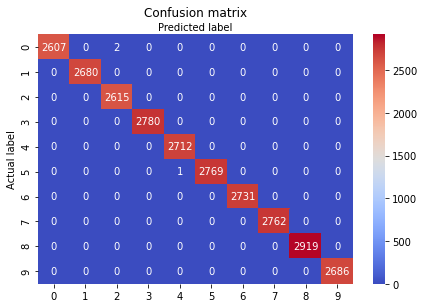

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predsRF)
class_names=[0,1,2,4,5,7,8,10,11,12]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Y_test = label_binarize(Y_test, classes=[0,1,2,4,5,7,8,10,11,12])


In [ ]:
Y_predsRF = label_binarize(Y_predsDT, classes=[0,1,2,4,5,7,8,10,11,12])


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_predsRF[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_predsRF.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

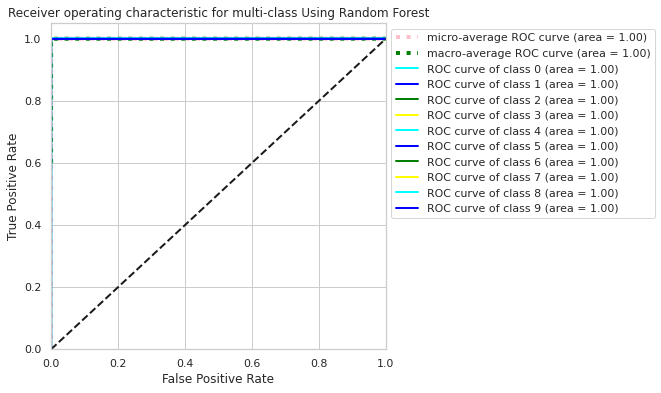

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'blue', 'green','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using Random Forest')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

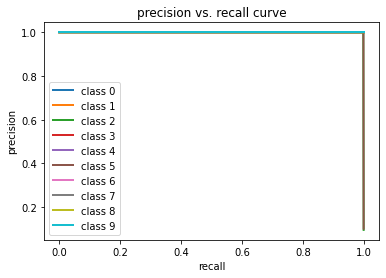

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_predsRF[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# **XGBoost Classifier**

In [ ]:
Y=data3['Label']

In [ ]:
X=data3.drop(['Label'],axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state = 2)

In [ ]:
st=StandardScaler()

In [ ]:
st.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train=pd.DataFrame(st.transform(X_train))
X_test=pd.DataFrame(st.transform(X_test))

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=1,learning_rate=0.01)
xgb.fit(X_train, Y_train)
print('With XGB  accuracy is: ',xgb.score(X_test,Y_test))

With XGB  accuracy is:  0.9995231807511737


In [ ]:
Y_predsXGB=xgb.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_predsXGB)

0.9995231807511737

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
confusion_matrix(Y_test, Y_predsXGB)



array([[2604,    0,    2,    0,    0,    2,    1,    0,    0,    0],
       [   0, 2680,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2611,    0,    0,    4,    0,    0,    0,    0],
       [   0,    0,    0, 2780,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2712,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    1, 2766,    0,    1,    1,    0],
       [   0,    0,    0,    0,    0,    0, 2731,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2762,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2919,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 2686]])

In [ ]:
print('Precision: {:.5f}'.format(precision_score(Y_test, Y_predsXGB, average='macro')))
print('Recall: {:.5f}'.format(recall_score(Y_test, Y_predsXGB, average='macro')))
print('F1-score: {:.5f}\n'.format(f1_score(Y_test, Y_predsXGB, average='macro')))

Precision: 0.99952
Recall: 0.99951
F1-score: 0.99952



In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Text(0.5, 257.44, 'Predicted label')

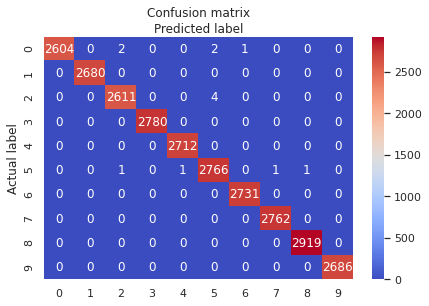

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predsXGB)
class_names=[0,1,2,4,5,7,8,10,11,12]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import sys
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
Y_test = label_binarize(Y_test, classes=[0,1,2,4,5,7,8,10,11,12])


In [ ]:
Y_predsXGB = label_binarize(Y_predsXGB, classes=[0,1,2,4,5,7,8,10,11,12])


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_predsXGB[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_predsXGB.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

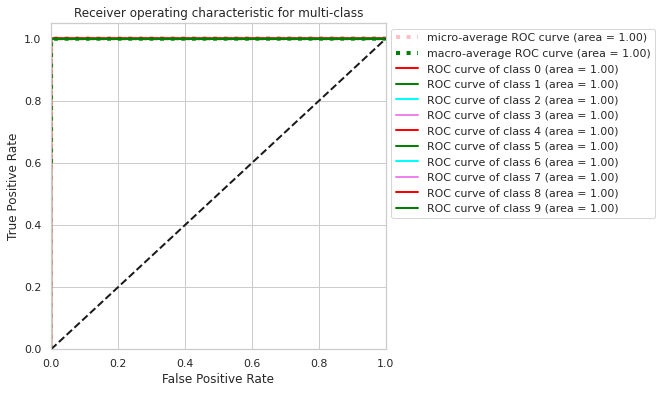

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['red', 'green', 'aqua','violet'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

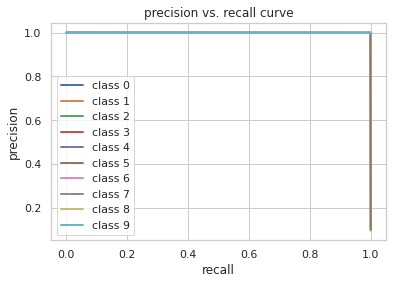

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_predsXGB[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

Multi-Class Classification Using ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
X = data3.drop('Label',axis=1)

In [ ]:
y=data3['Label']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
Y

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
X.shape

(90877, 17)

In [ ]:
model = Sequential()

model.add(Dense(17,input_shape=(17,), activation='relu'))

model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
st=StandardScaler()

In [ ]:
st.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train=pd.DataFrame(st.transform(X_train))
X_test=pd.DataFrame(st.transform(X_test))

In [ ]:
model.fit(X_train, y_train, batch_size=52, epochs=20)

Epoch 1/20
1224/1224 [==============================] - 11s 9ms/step - loss: 1.1630 - accuracy: 0.6353
Epoch 2/20
1224/1224 [==============================] - 10s 9ms/step - loss: 0.1842 - accuracy: 0.9572
Epoch 3/20
1224/1224 [==============================] - 11s 9ms/step - loss: 0.0906 - accuracy: 0.9781
Epoch 4/20
1224/1224 [==============================] - 10s 9ms/step - loss: 0.0504 - accuracy: 0.9900
Epoch 5/20
1224/1224 [==============================] - 10s 8ms/step - loss: 0.0308 - accuracy: 0.9973
Epoch 6/20
1224/1224 [==============================] - 10s 8ms/step - loss: 0.0239 - accuracy: 0.9985
Epoch 7/20
1224/1224 [==============================] - 10s 8ms/step - loss: 0.0104 - accuracy: 0.9987
Epoch 8/20
1224/1224 [==============================] - 10s 8ms/step - loss: 0.0100 - accuracy: 0.9985
Epoch 9/20
1224/1224 [==============================] - 10s 8ms/step - loss: 0.0057 - accuracy: 0.9991
Epoch 10/20
1224/1224 [==============================] - 10s 8ms/step - l

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:
accuracy_score(y_test_class,y_pred_class)

0.9989363262910798

In [ ]:
print('Precision: {:.5f}'.format(precision_score(y_test_class,y_pred_class,average="macro")))
print('Recall: {:.5f}'.format(recall_score(y_test_class,y_pred_class,average="macro")))
print('F1-score: {:.5f}\n'.format(f1_score(y_test_class,y_pred_class,average="macro")))

Precision: 0.99897
Recall: 0.99885
F1-score: 0.99891



In [ ]:
import sklearn.metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Text(0.5, 257.44, 'Predicted label')

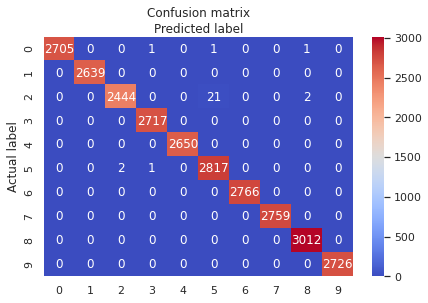

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_class, y_pred_class)
class_names=[0,1,2,4,5,7,8,10,11,12]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
n_classes=10

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

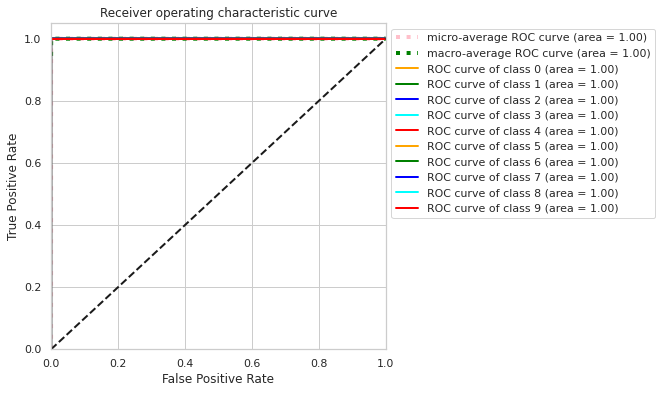

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['orange','green','blue','aqua','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

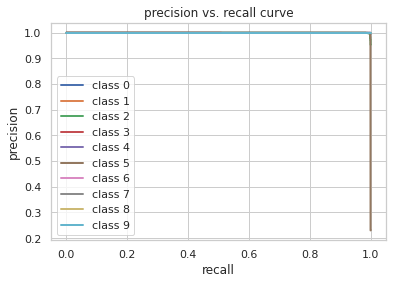

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2708
           1       1.00      1.00      1.00      2639
           2       1.00      1.00      1.00      2467
           3       1.00      1.00      1.00      2717
           4       1.00      1.00      1.00      2650
           5       1.00      1.00      1.00      2820
           6       1.00      1.00      1.00      2766
           7       1.00      1.00      1.00      2759
           8       1.00      1.00      1.00      3012
           9       1.00      1.00      1.00      2726

    accuracy                           1.00     27264
   macro avg       1.00      1.00      1.00     27264
weighted avg       1.00      1.00      1.00     27264

[[2705    0    1    1    0    1    0    0    0    0]
 [   0 2639    0    0    0    0    0    0    0    0]
 [   0    0 2461    0    1    3    0    0    2    0]
 [   0    0    0 2717    0    0    0    0    0    0]
 [   0    0    0    0 2650   